In [41]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model

In [38]:
files = glob.glob('*.csv')

prices = {}

X = []
y = []

delay = 14
no_features = 30

for f in files:
    data = pd.read_csv(f).to_numpy()/100
    prices[f]=data
    
    x_temp = []
    y_temp = []
    for j in range(no_features, data.shape[0]-delay):
        X.append(data[j-no_features : j])
        y.append(data[j + delay])
X = np.array(X)[:,:,0]
y = np.array(y)

In [ ]:
for ticker in prices:
    plt.figure(figsize=(3,2))
    plt.plot(prices[ticker])
    plt.title(ticker)
    plt.grid()

In [39]:
X.shape

(67954, 30)

In [40]:
y.shape

(67954, 1)

Loss = 7.858451451666827 PLN


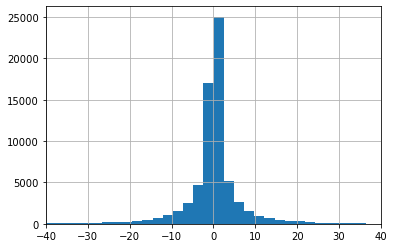

In [50]:
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

y_ = model.predict(X)

L = np.std(y_ - y)
print(f'Loss = {L*100} PLN')

h = plt.hist((y_-y)*100, 100)
plt.xlim(-40, 40)
plt.grid()

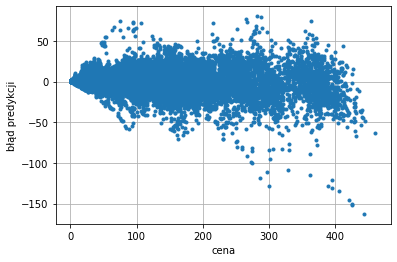

In [51]:
plt.plot(y*100, (y_-y)*100, '.')
plt.xlabel('cena')
plt.ylabel('błąd predykcji')
plt.grid()

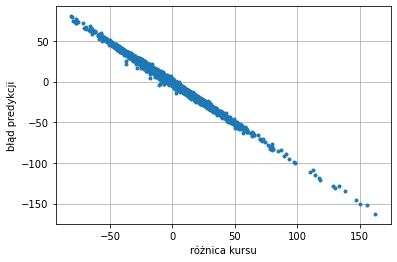

In [52]:
plt.plot((y-X[:,-1:])*100, (y_-y)*100, '.')
plt.xlabel('różnica kursu')
plt.ylabel('błąd predykcji')
plt.grid()

w=0.943073700697481
b=[0.26914781]


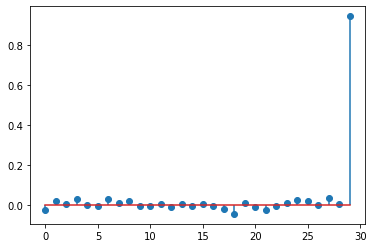

In [60]:
plt.stem(model.coef_[0])
print(f'w={model.coef_[0][-1]}')
print(f'b={model.intercept_*100}')

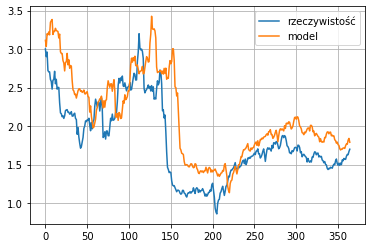

In [64]:
i1 = 0
i2 = 365

plt.plot(y[i1:i2]*100)
plt.plot(y_[i1:i2]*100)
plt.legend(('rzeczywistość', 'model'))
plt.grid()